# Deep Learning Project
## Mask detection

Group members:
- Lorenzo Pigozzi	--- m20200745
- Marta
- Gustavo
- Salim




### Steps
1.	Importing data and setting the directions 
2.	Brief data preprocessing       
3.	Model architecture 
4.  Model assessment      
5.  Deployment

### 1. Importing libraries and setting the directions <a class="anchor" id="1"></a>

In [10]:
# importing needed libraries
#%tensorflow_version 1.x
import tensorflow
import pandas as pd
import numpy as np
import keras
import os, shutil
import io


# keras
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras import callbacks 

# sklearn
from sklearn.metrics import classification_report, confusion_matrix

# matplotlib
import matplotlib.pyplot as plt

Directions Google Colab

In [2]:

# # for downloading the pictures
# from google.colab import drive
# drive.mount('/content/gdrive')
# !ls '/content/gdrive'  # take a look at the Google Drive content

In [ ]:
# ######## defining the paths
# original_masks = "gdrive/MyDrive/Project Deeplearning/Pics_with_masks/withMaskDataset/withMaskDataset/"
# original_faces = "gdrive/MyDrive/Project Deeplearning/Images/"

In [2]:
# # !ls /content/gdrive/MyDrive/Project_Deeplearning
# base_dir = 'gdrive/MyDrive/Project Deeplearning/'

# # creationof the folder
# # os.mkdir(train_dir)
# # setting the direction of the train
# train_dir = os.path.join(base_dir, 'train')

# # creationof the folder
# # os.mkdir(validation_dir)
# # setting the direction of the train
# validation_dir=os.path.join(base_dir, 'validation')

# # creationof the folder
# # os.mkdir(test_dir)
# # setting the direction of the train
# test_dir=os.path.join(base_dir, 'test')

In [ ]:
# train_masks_dir=os.path.join(train_dir, 'masks')
# # os.mkdir(train_masks_dir)
# train_no_masks_dir=os.path.join(train_dir, 'no_masks')
# # os.mkdir(train_no_masks_dir)

# validation_masks_dir=os.path.join(validation_dir, 'masks')
# # os.mkdir(validation_masks_dir)
# validation_no_masks_dir=os.path.join(validation_dir, 'no_masks')
# # os.mkdir(validation_no_masks_dir)

# test_masks_dir=os.path.join(test_dir, 'masks')
# # os.mkdir(test_masks_dir)
# test_no_masks_dir=os.path.join(test_dir, 'no_masks')
# # os.mkdir(test_no_masks_dir)

In [ ]:
#### Splitting the images in the folders Train, Validation and Test

## Train = 70, Val 15, Test 15

#fnames = ['Masks{}.png'.format(i) for i in range(0,989)]
#for fname in fnames:
#  src=os.path.join(original_masks, fname)
#  dst=os.path.join(train_masks_dir, fname)
#  shutil.copyfile(src,dst)

#fnames = ['Masks{}.png'.format(i) for i in range(990,1201)]
#for fname in fnames:
#   src=os.path.join(original_masks, fname)
#   dst=os.path.join(validation_masks_dir, fname)
#   shutil.copyfile(src,dst)

#fnames = ['Masks{}.png'.format(i) for i in range(1202,1413)]
#for fname in fnames:
#   src=os.path.join(original_masks, fname)
#   dst=os.path.join(test_masks_dir, fname)
#   shutil.copyfile(src,dst)


#fnames = ['Faces{}.png'.format(i) for i in range(0,989)]
#for fname in fnames:
#   src=os.path.join(original_faces, fname)
#   dst=os.path.join(train_no_masks_dir, fname)
#   shutil.copyfile(src,dst)

#fnames = ['Faces{}.png'.format(i) for i in range(990,1201)]
#for fname in fnames:
#   src=os.path.join(original_faces, fname)
#   dst=os.path.join(validation_no_masks_dir, fname)
#   shutil.copyfile(src,dst)

#fnames = ['Faces{}.png'.format(i) for i in range(1202,1413)]
#for fname in fnames:
#   src=os.path.join(original_faces, fname)
#   dst=os.path.join(test_no_masks_dir, fname)
#   shutil.copyfile(src,dst)

### 2. Model Architecture

In [63]:
# Sequential model | Create linear stack of layers
model = Sequential()

# Convolutional layer | Conv2D
model.add(Conv2D(26, (3, 3), activation='relu', input_shape=(150,150, 3)))
model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model.add(Flatten())
model.add(Dropout(0.2))
# Hidden layer
model.add(Dense(32, activation='relu'))
# Output layer
model.add(Dense(1, activation='sigmoid'))

In [64]:
# compiling the model
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [65]:
# visualizing the model structure
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 26)      728       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 26)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 142376)            0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 142376)            0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                4556064   
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 33        
Total params: 4,556,825
Trainable params: 4,556,825
Non-trainable params: 0
___________________________________________

In [66]:
# scaling the data

## DATA AUGMENTATION
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
# train_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [67]:
# importing the images
# flow when numpy array input, flow_from_directory when the inputs are directly images

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (150, 150),
                                                 batch_size = 46,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (150, 150),
                                                        batch_size = 46,
                                                        color_mode="rgb",
                                                        class_mode = 'binary')

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (150, 150),
                                            batch_size = 46,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [68]:
# fitting the model

hist = model.fit_generator(training_set,
                         steps_per_epoch = 43,
                         epochs = 10,
                         validation_data = validation_set,
                         validation_steps = len(validation_set)
                         )

Epoch 1/10
43/43 [==============================] - 45s 1s/step - loss: 1.2612 - accuracy: 0.6335 - val_loss: 0.4891 - val_accuracy: 0.7749
Epoch 2/10
43/43 [==============================] - 45s 1s/step - loss: 0.4432 - accuracy: 0.8013 - val_loss: 0.3896 - val_accuracy: 0.8199
Epoch 3/10
43/43 [==============================] - 46s 1s/step - loss: 0.3725 - accuracy: 0.8367 - val_loss: 0.4244 - val_accuracy: 0.8009
Epoch 4/10
43/43 [==============================] - 45s 1s/step - loss: 0.3630 - accuracy: 0.8337 - val_loss: 0.3580 - val_accuracy: 0.8412
Epoch 5/10
43/43 [==============================] - 45s 1s/step - loss: 0.3435 - accuracy: 0.8367 - val_loss: 0.3525 - val_accuracy: 0.8412
Epoch 6/10
43/43 [==============================] - 46s 1s/step - loss: 0.3012 - accuracy: 0.8675 - val_loss: 0.3681 - val_accuracy: 0.8578
Epoch 7/10
43/43 [==============================] - 46s 1s/step - loss: 0.2966 - accuracy: 0.8746 - val_loss: 0.4739 - val_accuracy: 0.7938
Epoch 8/10
43/43 [==

In [46]:
# displaying target labels
training_set.class_indices

{'masks': 0, 'no_masks': 1}

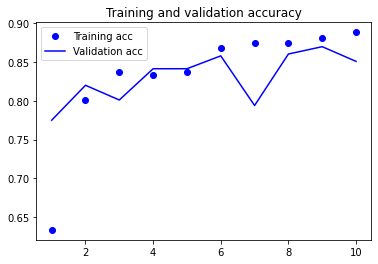

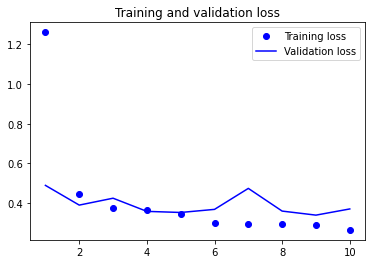

In [69]:
# displaying the accuracy and loss over the training epochs
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [70]:
Y_pred = model.predict(validation_set, 25)    # ceil(num_of_test_samples / batch_size)

# changing the result as True and False
Y_pred = (Y_pred>0.5)

In [71]:
# classification report
print('Classification Report')
target_names = ['Mask', 'No Mask']
print(classification_report(validation_set.classes, Y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

        Mask       0.50      0.49      0.50       211
     No Mask       0.50      0.51      0.50       211

    accuracy                           0.50       422
   macro avg       0.50      0.50      0.50       422
weighted avg       0.50      0.50      0.50       422



## Improving the NN

In [ ]:
### Code for DATA AUGMENTATION

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
# validation and test only rescaled
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Set callbacks to analyze the best number of epochs | Try 25,50, and 100

earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                          mode ="min", patience = 5,  
                                          restore_best_weights = True) 
  
history = model.fit(partial_images, partial_labels, batch_size = 128,  
                      epochs = 25, validation_data =(X_val, y_val),  
                      callbacks =[earlystopping]) 

In [ ]:
# Train the model for XXXXXX epochs
#model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=XXXXXXX)

In [ ]:
# # checking the information of the batch we split
# # checking if it makes sense with the size of the images

# batchX, batchy = train_iterator.next()
# print('Train Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

# batchX, batchy = validation_iterator.next()
# print('Validation Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

# batchX, batchy = test_iterator.next()
# print('Test Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

In [ ]:
# # Evaluate the model
# _, acc = model.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=0)
# print('Test Accuracy: %.3f' % (acc * 100))

### 4. Model assessment

In [72]:
# Predicting the test set

Y_pred = model.predict_generator(test_set, 25)    # ceil(num_of_test_samples / batch_size)

# changing the result as True and False
Y_pred = (Y_pred>0.5)

# if you have the last version of tensorflow, the predict_generator is deprecated.
# you should use the predict method.
# if you do not have the last version, you must use predict_generator

In [73]:
Y_pred.shape
# test_set.classes.shape

(422, 1)

In [74]:
# confusion matrix
print('Confusion matrix')
print(confusion_matrix(test_set.classes, Y_pred))

Confusion matrix
[[179  32]
 [ 34 177]]


In [75]:
# classification report
print('Classification Report')
target_names = ['Mask', 'No Mask']
print(classification_report(test_set.classes, Y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

        Mask       0.84      0.85      0.84       211
     No Mask       0.85      0.84      0.84       211

    accuracy                           0.84       422
   macro avg       0.84      0.84      0.84       422
weighted avg       0.84      0.84      0.84       422



### 5. Deployment

Example
https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

Problems websites

https://colab.research.google.com/github/google/eng-edu/blob/master/ml/pc/exercises/image_classification_part1.ipynb

https://github.com/python-pillow/Pillow/issues/1006